# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress
from datetime import date

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#Import today's date in mm/dd/yyyy format
today = date.today()
today = today.strftime("%m/%d/%Y")

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
city_data = []
print("Beginning Data Retrieval     ")
print("-----------------------------")
record_count = 1
set_count = 1
for i, city in enumerate(cities):
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        #city_url = url + "&q=" + city
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    record_count += 1
    city_url = url + "&q=" + city
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    except:
        print("City not found. Skipping...")
        pass
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bolungarvik
City not found. Skipping...
Processing Record 2 of Set 1 | nome
Processing Record 3 of Set 1 | port augusta
Processing Record 4 of Set 1 | sucua
Processing Record 5 of Set 1 | thompson
Processing Record 6 of Set 1 | namibe
Processing Record 7 of Set 1 | kangavar
Processing Record 8 of Set 1 | arlit
Processing Record 9 of Set 1 | souillac
Processing Record 10 of Set 1 | lompoc
Processing Record 11 of Set 1 | port alfred
Processing Record 12 of Set 1 | grindavik
Processing Record 13 of Set 1 | chapais
Processing Record 14 of Set 1 | hasaki
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | alofi
Processing Record 17 of Set 1 | barrow
Processing Record 18 of Set 1 | nkhotakota
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | augusto correa
Processing Record 21 of Set 1 | kapaa
Processing Record 22 of Set 1 | albany
Processing Record 23 of Set 1 

Processing Record 42 of Set 4 | presidente dutra
Processing Record 43 of Set 4 | tuktoyaktuk
Processing Record 44 of Set 4 | ribeira grande
Processing Record 45 of Set 4 | parana
Processing Record 46 of Set 4 | richards bay
Processing Record 47 of Set 4 | basco
Processing Record 48 of Set 4 | wewak
Processing Record 49 of Set 4 | zhangjiakou
Processing Record 0 of Set 5 | whitecourt
Processing Record 1 of Set 5 | santa cruz del sur
Processing Record 2 of Set 5 | havoysund
Processing Record 3 of Set 5 | kungurtug
Processing Record 4 of Set 5 | stournaraiika
City not found. Skipping...
Processing Record 5 of Set 5 | avera
Processing Record 6 of Set 5 | deputatskiy
Processing Record 7 of Set 5 | kyra
Processing Record 8 of Set 5 | fort-shevchenko
Processing Record 9 of Set 5 | mahebourg
Processing Record 10 of Set 5 | yarmouth
Processing Record 11 of Set 5 | aksu
Processing Record 12 of Set 5 | eureka
Processing Record 13 of Set 5 | port macquarie
Processing Record 14 of Set 5 | saint geo

Processing Record 31 of Set 8 | lushunkou
City not found. Skipping...
Processing Record 32 of Set 8 | talaya
Processing Record 33 of Set 8 | atherton
Processing Record 34 of Set 8 | ushtobe
Processing Record 35 of Set 8 | brae
Processing Record 36 of Set 8 | constitucion
Processing Record 37 of Set 8 | formoso do araguaia
City not found. Skipping...
Processing Record 38 of Set 8 | haines junction
Processing Record 39 of Set 8 | tezu
Processing Record 40 of Set 8 | portland
Processing Record 41 of Set 8 | salinopolis
Processing Record 42 of Set 8 | santa maria
Processing Record 43 of Set 8 | orangeburg
Processing Record 44 of Set 8 | port hawkesbury
Processing Record 45 of Set 8 | anshun
Processing Record 46 of Set 8 | krasnoselkup
Processing Record 47 of Set 8 | miyako
Processing Record 48 of Set 8 | quatre cocos
Processing Record 49 of Set 8 | neiafu
Processing Record 0 of Set 9 | coihaique
Processing Record 1 of Set 9 | buala
Processing Record 2 of Set 9 | pital
Processing Record 3 o

City not found. Skipping...
Processing Record 14 of Set 12 | umm lajj
Processing Record 15 of Set 12 | bam
Processing Record 16 of Set 12 | aakirkeby
City not found. Skipping...
Processing Record 17 of Set 12 | edson
Processing Record 18 of Set 12 | makinsk
Processing Record 19 of Set 12 | baikunthpur
Processing Record 20 of Set 12 | rabat
Processing Record 21 of Set 12 | ust-kulom
Processing Record 22 of Set 12 | springbok
Processing Record 23 of Set 12 | pavlohrad
Processing Record 24 of Set 12 | mandalgovi
Processing Record 25 of Set 12 | portobelo
Processing Record 26 of Set 12 | lichinga
Processing Record 27 of Set 12 | rio gallegos
Processing Record 28 of Set 12 | brawley
Processing Record 29 of Set 12 | diveyevo
Processing Record 30 of Set 12 | beruwala
Processing Record 31 of Set 12 | palembang
Processing Record 32 of Set 12 | staunton
Processing Record 33 of Set 12 | rincon
Processing Record 34 of Set 12 | mount hagen
Processing Record 35 of Set 12 | dawson creek
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_data_pd = pd.DataFrame(city_data)
city_data_pd.count()

City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

In [5]:
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nome,64.5011,-165.4064,14.00,73,90,17.27,US,1610423337
1,port augusta,-32.5000,137.7667,95.00,43,0,17.27,AU,1610423217
2,sucua,-2.4667,-78.1667,67.32,79,84,2.66,EC,1610423337
3,thompson,55.7435,-97.8558,19.40,93,75,4.61,CA,1610423337
4,namibe,-15.1961,12.1522,70.70,68,67,5.73,AO,1610423337


In [6]:
#Extract
lats = city_data_pd["Lat"]
max_temp =city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]
city_data_pd.to_csv(output_data_file, index_label = "City_ID")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
city_data_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,21.493894,18.329271,48.189000,75.080000,52.663636,8.370982,1.610423e+09
std,32.995999,90.818239,31.335675,18.928515,40.141979,6.402007,5.926795e+01
min,-54.800000,-175.200000,-42.410000,1.000000,0.000000,0.200000,1.610423e+09
25%,-4.801125,-58.955650,27.000000,65.000000,2.000000,3.440000,1.610423e+09
50%,26.288000,25.981750,55.760000,80.000000,67.500000,6.835000,1.610423e+09
75%,48.616600,98.142125,74.332500,88.000000,90.000000,11.500000,1.610423e+09
max,78.218600,179.316700,102.090000,100.000000,100.000000,40.560000,1.610423e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

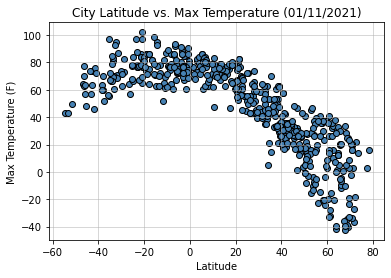

In [8]:
#Create plot
plt.scatter(lats, max_temp, facecolor = "steelblue", edgecolor = "black")
plt.title(f"City Latitude vs. Max Temperature ({today})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(linestyle = '-', linewidth = 1, alpha = 0.5)

#Save the image
plt.savefig("output_data/City Lat vs Max Temp.png")
plt.show()

City Latitude vs. Max Temperature plot shows the maximum temperature recorded at the latitude of the city it was taken from.

## Latitude vs. Humidity Plot

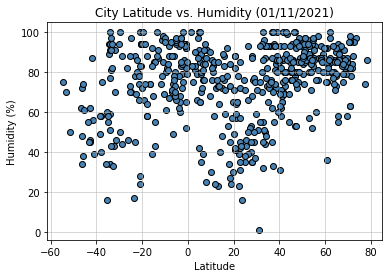

In [9]:
#Create plot
plt.scatter(lats, humidity, facecolor = "steelblue", edgecolor = "black")
plt.title(f"City Latitude vs. Humidity ({today})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle = '-', linewidth = 1, alpha = 0.5)

#Save the image
plt.savefig("output_data/City Lat vs Humidity.png")

City Latitude vs. Humidity plot shows the humidity percentage recorded at the latitude of the city it was taken from.

## Latitude vs. Cloudiness Plot

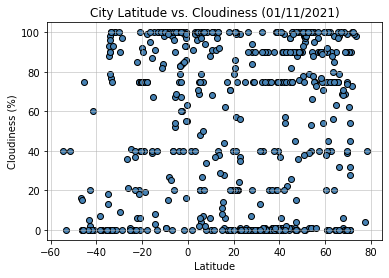

In [10]:
#Create plot
plt.scatter(lats, cloudiness, facecolor = "steelblue", edgecolor = "black")
plt.title(f"City Latitude vs. Cloudiness ({today})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-5,105)
plt.grid(linestyle = '-', linewidth = 1, alpha = 0.5)

#Save the image
plt.savefig("output_data/City Lat vs Cloudiness.png")

City Latitude vs. Cloudiness plot shows the cloudiness percentage recorded at the latitude of the city it was taken from.

## Latitude vs. Wind Speed Plot

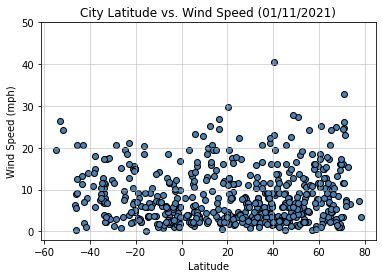

In [11]:
#Create plot
plt.scatter(lats,wind_speed, facecolor = "steelblue", edgecolor = "black")
plt.title(f"City Latitude vs. Wind Speed ({today})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,50)
plt.grid(linestyle = '-', linewidth = 1, alpha = 0.5)

#Save the image
plt.savefig("output_data/City Lat vs Wind Speed.png")

City Latitude vs. Wind Speed plot shows the wind speed recorded in miles per hour at the latitude of the city it was taken from.

## Linear Regression

In [12]:
#Create northern and southern hemisphere dataframes
northern_hemisphere = city_data_pd[city_data_pd["Lat"] >= 0]
southern_hemisphere = city_data_pd[city_data_pd["Lat"] < 0]

#Define functions for linear regression and scatter plot
def linear_regression(x,y,title,text_coordinates):
    #print(f"The r-squared is : {round(st.pearsonr(x,y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x = " + str(round(intercept,2))
    plt.scatter(x,y, alpha=0.5, edgecolor='black')
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize = 15, color = "red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue ** 2}")
    #print(f"The line equation is: {line_eq}")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7302644393950786


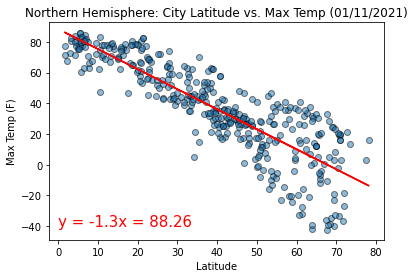

In [25]:
x = northern_hemisphere["Lat"]
y = northern_hemisphere["Max Temp"]

plt.title(f'Northern Hemisphere: City Latitude vs. Max Temp ({today})')
plt.savefig("output_data/Northern_MaxTempVsLat_Regression.png")

linear_regression(x,y,'Max Temp (F)',(0,-40))

There is a strong negative correlation of higher temperatures at latitudes closer to the equator and cooler temperatures as you increase north. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.16543087571607726


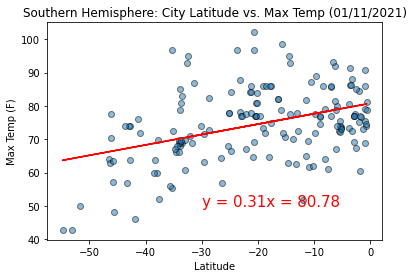

In [14]:
x = southern_hemisphere["Lat"]
y = southern_hemisphere["Max Temp"]
plt.title(f'Southern Hemisphere: City Latitude vs. Max Temp ({today})')

plt.savefig("output_data/Southern_MaxTemp_Regression.png")

linear_regression(x,y,'Max Temp (F)',(-30,50))

There is a moderate positive correlation of the temperature decreasing the farther south from the equator. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.11989525122049854


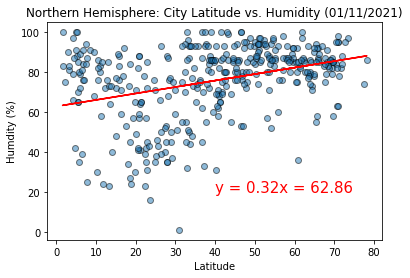

In [15]:
x = northern_hemisphere["Lat"]
y = northern_hemisphere["Humidity"]
plt.title(f'Northern Hemisphere: City Latitude vs. Humidity ({today})')

plt.savefig("output_data/Northern_Humidity_Regression.png")

linear_regression(x,y,'Humdity (%)',(40,20))

There is a weak positive correlation as humidity increases the farther north you go. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.17133572321080118


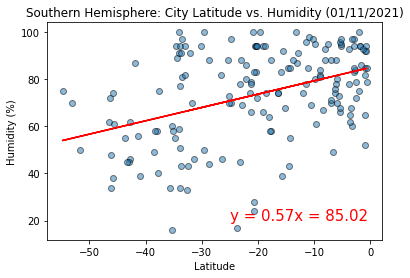

In [16]:
x = southern_hemisphere["Lat"]
y = southern_hemisphere["Humidity"]
plt.title(f'Southern Hemisphere: City Latitude vs. Humidity ({today})')

plt.savefig("output_data/Southern_Humidity_Regression.png")

linear_regression(x,y,'Humidity (%)',(-25,20))

There is a very weak positive correlation between humidity and the southern hemisphere. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.022403413080819192


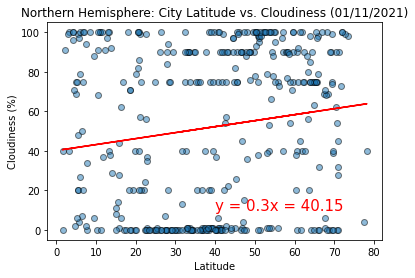

In [17]:
x = northern_hemisphere["Lat"]
y = northern_hemisphere["Cloudiness"]
plt.title(f'Northern Hemisphere: City Latitude vs. Cloudiness ({today})')

plt.savefig("output_data/Northern_Cloudiness_Regression.png")

linear_regression(x,y,'Cloudiness (%)',(40,10))

There is a positive correlation shown in the plot, however the plot also shows cloudiness at all percentages in most of the latitudes. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.21406613231347407


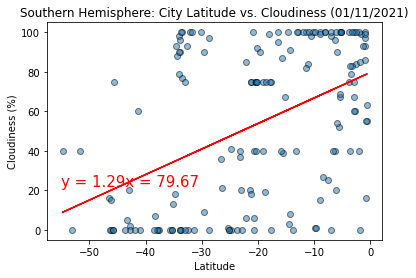

In [18]:
x = southern_hemisphere["Lat"]
y = southern_hemisphere["Cloudiness"]
plt.title(f'Southern Hemisphere: City Latitude vs. Cloudiness ({today})')

plt.savefig("output_data/Southern_Cloudiness_Regression.png")

linear_regression(x,y,'Cloudiness (%)',(-55,22))

There is a positive correlation shown again, however the graph shows again most cloudiness percentages at most of the latitudes. This is also confirmed with the northern hemisphere and cloudiness. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.003843065703885643


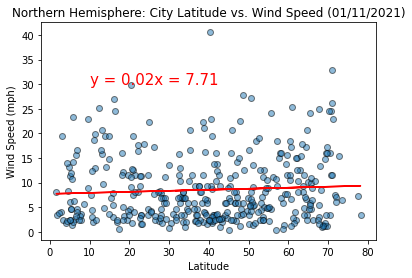

In [19]:
x = northern_hemisphere["Lat"]
y = northern_hemisphere["Wind Speed"]
plt.title(f'Northern Hemisphere: City Latitude vs. Wind Speed ({today})')

plt.savefig("output_data/Northern_WindSpeed_Regression.png")

linear_regression(x,y,'Wind Speed (mph)',(10,30))

There is a very weak correlation between moving north and wind speed.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.15248184480763569


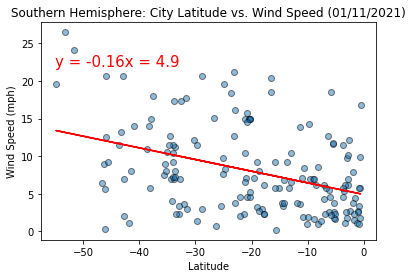

In [20]:
x = southern_hemisphere["Lat"]
y = southern_hemisphere["Wind Speed"]

plt.title(f'Southern Hemisphere: City Latitude vs. Wind Speed ({today})')

plt.savefig("output_data/Southern_WindSpeed_Regression.png")

linear_regression(x,y,'Wind Speed (mph)',(-55,22))

There is a negative correlation between moving farther south from the equator and wind speed. 